# Image Data Augmentation Exercise : CIFAR-100
---
## 데이터가 더 부족한 세상으로!

[여기 참고](https://www.cs.toronto.edu/~kriz/cifar.html)

## Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets.cifar100 import load_data

In [2]:
(train_x, train_y), (test_x, test_y) = load_data()
# (train_x, train_y), (test_x, test_y) = load_data(label_mode='coarse')

169001437/169001437 [==============================] - 4s 0us/step


In [3]:
np.unique(train_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [4]:
label_dict = {0:'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle',
              10: 'bowl', 11: 'boy',12: 'bridge',13: 'bus',14: 'butterfly',15: 'camel',16: 'can',17: 'castle',18: 'caterpillar',19: 'cattle',
              20: 'chair',21: 'chimpanzee',22: 'clock',23: 'cloud',24: 'cockroach',25: 'couch',26: 'cra',27: 'crocodile',28: 'cup',29: 'dinosaur',
              30: 'dolphin',31: 'elephant',32: 'flatfish',33: 'forest',34: 'fox',35: 'girl',36: 'hamster',37: 'house',38: 'kangaroo',39: 'keyboard',
              40: 'lamp',41: 'lawn_mower',42: 'leopard',43: 'lion',44: 'lizard',45: 'lobster',46: 'man',47: 'maple_tree',48: 'motorcycle',49: 'mountain',
              50: 'mouse',51: 'mushroom',52: 'oak_tree',53: 'orange',54: 'orchid',55: 'otter',56: 'palm_tree',57: 'pear',58: 'pickup_truck',59: 'pine_tree',
              60: 'plain',61: 'plate',62: 'poppy',63: 'porcupine',64: 'possum',65: 'rabbit',66: 'raccoon',67: 'ray',68: 'road',69: 'rocket',
              70: 'rose',71: 'sea',72: 'seal',73: 'shark',74: 'shrew',75: 'skunk',76: 'skyscraper',77: 'snail',78: 'snake',79: 'spider',
              80: 'squirrel',81: 'streetcar',82: 'sunflower',83: 'sweet_pepper',84: 'table',85: 'tank',86: 'telephone',87: 'television',88: 'tiger',89: 'tractor',
              90: 'train',91: 'trout',92: 'tulip',93: 'turtle',94: 'wardrobe',95: 'whale',96: 'willow_tree',97: 'wolf',98: 'woman',99: 'worm'
            }

label_dict[0]

'apple'

* 데이터 살펴보기

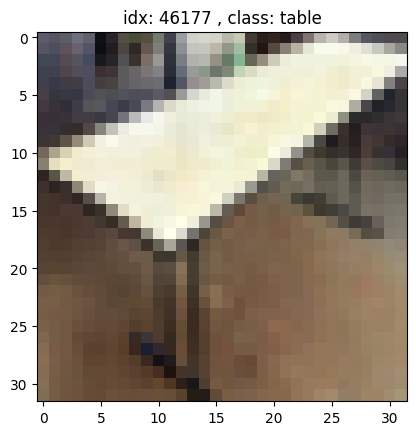

In [8]:
rand_i = np.random.randint(0, train_x.shape[0])

plt.title(f'idx: {rand_i} , class: { label_dict[train_y[rand_i][0]] }')
plt.imshow( train_x[rand_i] )
plt.show()

In [7]:
rows = 5
fig, axes = plt.subplots(rows, len(label_dict), figsize=(len(label_dict), rows) )

for img_id in range(len(label_dict)) :
    imgs = train_x[train_y.reshape(-1)==img_id]
    imgs_len = len(imgs)

    for row_i in range(rows) :
        axe = axes[row_i, img_id]
        axe.imshow( imgs[np.random.randint(imgs_len)], interpolation='none' )
        axe.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Data Preprocessing

* Data split
    - training set : test set = 8 : 2
    - training set : validation set = 8 : 2
    - 재현을 위한 난수 고정 : 2023

In [9]:
from sklearn.model_selection import train_test_split as tts

In [10]:
train_x, val_x, train_y, val_y = tts(train_x, train_y, test_size=0.2, random_state=2023)

In [11]:
train_x.shape, train_y.shape

((40000, 32, 32, 3), (40000, 1))

* Scaling

    - min-max scaling (선택사항)
        1. RGB 정보 전체를 min-max
        2. R 따로 G 따로 B 따로 min-max, 그 후 하나로 통합

In [12]:
# min-max scaling 1번 방법
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255, 0)

In [13]:
train_x_mm1 = (train_x - min_n) / (max_n - min_n)
val_x_mm1 = (val_x - min_n) / (max_n - min_n)
test_x_mm1 = (test_x - min_n) / (max_n - min_n)

In [15]:
train_x_mm1.max(), train_x_mm1.min()

(1.0, 0.0)

In [16]:
# min-max scaling 2번 방법
tr_r_max, tr_r_min = train_x[:,:,:,0].max(), train_x[:,:,:,0].min()
tr_g_max, tr_g_min = train_x[:,:,:,1].max(), train_x[:,:,:,1].min()
tr_b_max, tr_b_min = train_x[:,:,:,2].max(), train_x[:,:,:,2].min()

In [17]:
train_r_mm = (train_x[:,:,:,0] - tr_r_min) / (tr_r_max - tr_r_min)
train_g_mm = (train_x[:,:,:,1] - tr_g_min) / (tr_g_max - tr_g_min)
train_b_mm = (train_x[:,:,:,2] - tr_b_min) / (tr_b_max - tr_b_min)

In [18]:
train_x_mm = np.stack((train_r_mm, train_g_mm, train_b_mm), axis=3)

In [19]:
train_x_mm.shape

(40000, 32, 32, 3)

In [21]:
val_r_mm = (val_x[:,:,:,0] - tr_r_min) / (tr_r_max - tr_r_min)
val_g_mm = (val_x[:,:,:,1] - tr_g_min) / (tr_g_max - tr_g_min)
val_b_mm = (val_x[:,:,:,2] - tr_b_min) / (tr_b_max - tr_b_min)

In [22]:
val_x_mm = np.stack((val_r_mm, val_g_mm, val_b_mm), axis=3)

In [23]:
val_x_mm.shape

(10000, 32, 32, 3)

In [24]:
test_r_mm = (test_x[:,:,:,0] - tr_r_min) / (tr_r_max - tr_r_min)
test_g_mm = (test_x[:,:,:,1] - tr_g_min) / (tr_g_max - tr_g_min)
test_b_mm = (test_x[:,:,:,2] - tr_b_min) / (tr_b_max - tr_b_min)

In [25]:
test_x_mm = np.stack((test_r_mm, test_g_mm, test_b_mm), axis=3)

In [26]:
test_x_mm.shape

(10000, 32, 32, 3)

* One-hot encoding

In [ ]:
train_y.shape
train_y

In [31]:
class_n = len(np.unique(train_y))

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
train_y = to_categorical(train_y, class_n)
val_y = to_categorical(val_y, class_n)
test_y = to_categorical(test_y, class_n)

* Data shape 재확인

In [34]:
train_x_mm.shape, train_y.shape

((40000, 32, 32, 3), (40000, 100))

In [35]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## **Image Data Augmentation**

- ImageDataGenerator : [**전체 옵션 참고**](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
- .flow( )

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
trainIDG = ImageDataGenerator(rotation_range=15,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.15,
                              zoom_range=0.15,
                              )

valIDG = ImageDataGenerator()

In [39]:
flow_trainIDG = trainIDG.flow(train_x_mm, train_y)
flow_valIDG = valIDG.flow(val_x_mm, val_y)

## Modeling : CNN

- 조건
    1. Sequential API, Functiona API 중 택일.
    2. [이 구조를 미니 버전으로 활용해봐도 좋다.](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
    3. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
    4. Early Stopping을 사용할 것.

In [40]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [47]:
# Functional API
# 1. 세션 클리어
clear_session()

# 2. 레이어 엮기
il = Input(shape=(32,32,3) )

hl = Conv2D(filters=64,        # 새롭게 제작하려는 feature map의 수! 서로 다른 filter의 수
            kernel_size=(3,3), # Conv filter의 가로세로 사이즈
            strides=(1,1),     # Conv filter의 이동 보폭
            padding='same',    # 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보 더 반영
            activation='relu'  # 명시 주의!
            )(il)
hl = Conv2D(filters=64,        # 새롭게 제작하려는 feature map의 수! 서로 다른 filter의 수
            kernel_size=(3,3), # Conv filter의 가로세로 사이즈
            strides=(1,1),     # Conv filter의 이동 보폭
            padding='same',    # 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보 더 반영
            activation='relu'  # 명시 주의!
            )(hl)
hl = MaxPool2D(pool_size=(2,2),# Pool filter 가로세로 사이즈
               strides=(2,2)   # Pool filter의 이동 보폭
               )(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.5)(hl)

hl = Conv2D(filters=128,        # 새롭게 제작하려는 feature map의 수! 서로 다른 filter의 수
            kernel_size=(3,3), # Conv filter의 가로세로 사이즈
            strides=(1,1),     # Conv filter의 이동 보폭
            padding='same',    # 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보 더 반영
            activation='relu'  # 명시 주의!
            )(hl)
hl = Conv2D(filters=128,        # 새롭게 제작하려는 feature map의 수! 서로 다른 filter의 수
            kernel_size=(3,3), # Conv filter의 가로세로 사이즈
            strides=(1,1),     # Conv filter의 이동 보폭
            padding='same',    # 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보 더 반영
            activation='relu'  # 명시 주의!
            )(hl)
hl = MaxPool2D(pool_size=(2,2),# Pool filter 가로세로 사이즈
               strides=(2,2)   # Pool filter의 이동 보폭
               )(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.5)(hl)

hl = Flatten()(hl)
hl = Dense(1024, activation='relu')(hl)
ol = Dense(100, activation='softmax')(hl)

# 3. 모델 시작과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0     

* Early Stopping

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
es = EarlyStopping(monitor='val_loss',       # 얼리스토핑 적용할 관측 대상
                   min_delta=0,              # 임계값.
                   patience=3,               # 성능 개선 미발생시 몇 epoch 더 진행할 것인가.
                   verbose=1,
                   restore_best_weights=True # 가장 성능 좋은 epoch의 가중치로 되돌림
                   )

* .fit( )
    - Data Augmentation 과정에서 생성한 ImageDataGenerator를 사용해야 한다.

In [50]:
model.fit(flow_trainIDG,                # 위에서 만든 ImageDataGenerator 사용!
          validation_data=flow_valIDG,  # validation data도 ImageDataGenerator 사용!
          epochs=10000, verbose=1,
          callbacks=[es]                # 얼리스토핑 적용!
          )

Epoch 1/10000
1250/1250 [==============================] - 45s 26ms/step - loss: 4.0804 - accuracy: 0.0841 - val_loss: 4.0402 - val_accuracy: 0.1054
Epoch 2/10000
1250/1250 [==============================] - 32s 26ms/step - loss: 3.5838 - accuracy: 0.1485 - val_loss: 3.4358 - val_accuracy: 0.1836
Epoch 3/10000
1250/1250 [==============================] - 31s 25ms/step - loss: 3.3809 - accuracy: 0.1827 - val_loss: 3.6172 - val_accuracy: 0.1628
Epoch 4/10000
1250/1250 [==============================] - 32s 25ms/step - loss: 3.2250 - accuracy: 0.2094 - val_loss: 3.0372 - val_accuracy: 0.2392
Epoch 5/10000
1250/1250 [==============================] - 31s 25ms/step - loss: 3.1083 - accuracy: 0.2301 - val_loss: 3.2196 - val_accuracy: 0.2268
Epoch 6/10000
1250/1250 [==============================] - 31s 25ms/step - loss: 3.0036 - accuracy: 0.2521 - val_loss: 2.9238 - val_accuracy: 0.2734
Epoch 7/10000
1250/1250 [==============================] - 32s 26ms/step - loss: 2.9174 - accuracy: 0.2672

KeyboardInterrupt: ignored

* .evaluate( )

In [51]:
model.evaluate(test_x_mm, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 2.8866 - accuracy: 0.3080


[2.886594533920288, 0.30799999833106995]

* .predict( )

In [52]:
y_pred = model.predict(test_x_mm)

313/313 [==============================] - 1s 3ms/step


In [53]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.argmax(test_y, axis=1)

In [54]:
y_pred_arg[0]

79

In [56]:
test_y_arg[0]

49

* 평가 지표

In [57]:
from sklearn.metrics import accuracy_score, classification_report

In [58]:
accuracy_score(test_y_arg, y_pred_arg)

0.308

In [59]:
print( classification_report(test_y_arg, y_pred_arg, target_names=list(label_dict.values())) )

               precision    recall  f1-score   support

        apple       0.81      0.46      0.59       100
aquarium_fish       0.62      0.24      0.35       100
         baby       0.32      0.20      0.25       100
         bear       0.38      0.12      0.18       100
       beaver       0.12      0.08      0.10       100
          bed       0.47      0.21      0.29       100
          bee       0.25      0.47      0.33       100
       beetle       0.34      0.47      0.39       100
      bicycle       0.33      0.32      0.32       100
       bottle       0.77      0.20      0.32       100
         bowl       0.34      0.13      0.19       100
          boy       0.49      0.23      0.31       100
       bridge       0.52      0.23      0.32       100
          bus       0.46      0.19      0.27       100
    butterfly       0.33      0.10      0.15       100
        camel       0.25      0.16      0.20       100
          can       0.63      0.24      0.35       100
       ca

## Visualization

* 실제 데이터 확인

idx = 7957
해당 인덱스의 이미지는 keyboard
모델의 예측 : leopard
모델의 클래스별 확률 : 
-------------------
apple 0.0
aquarium_fish 0.0
baby 0.0
bear 3.0
beaver 7.0
bed 0.0
bee 0.0
beetle 0.0
bicycle 0.0
bottle 0.0
bowl 0.0
boy 0.0
bridge 9.0
bus 0.0
butterfly 0.0
camel 0.0
can 0.0
castle 1.0
caterpillar 0.0
cattle 3.0
chair 0.0
chimpanzee 9.0
clock 0.0
cloud 0.0
cockroach 0.0
couch 0.0
cra 0.0
crocodile 0.0
cup 0.0
dinosaur 2.0
dolphin 0.0
elephant 5.0
flatfish 0.0
forest 0.0
fox 0.0
girl 0.0
hamster 0.0
house 1.0
kangaroo 2.0
keyboard 0.0
lamp 0.0
lawn_mower 0.0
leopard 10.0
lion 0.0
lizard 0.0
lobster 0.0
man 0.0
maple_tree 0.0
motorcycle 0.0
mountain 0.0
mouse 1.0
mushroom 1.0
oak_tree 0.0
orange 0.0
orchid 0.0
otter 2.0
palm_tree 0.0
pear 0.0
pickup_truck 0.0
pine_tree 0.0
plain 0.0
plate 0.0
poppy 0.0
porcupine 1.0
possum 4.0
rabbit 0.0
raccoon 6.0
ray 0.0
road 0.0
rocket 0.0
rose 0.0
sea 0.0
seal 2.0
shark 0.0
shrew 2.0
skunk 0.0
skyscraper 0.0
snail 0.0
snake 0.0
spider 0.0
squirrel 3.0
streetcar 0.0

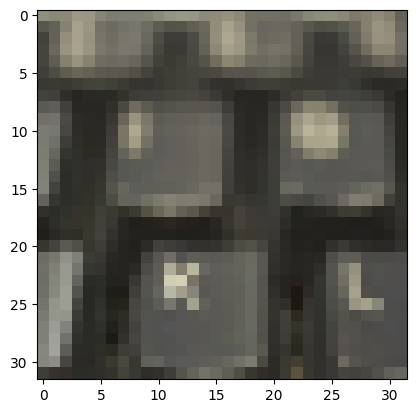

In [60]:
rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx])
plt.show()

* 틀린 이미지만 확인해보기

In [61]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

6920

idx = 8604
해당 인덱스의 이미지는 camel
모델의 예측 : kangaroo
모델의 클래스별 확률 : 
-------------------
apple 0.0
aquarium_fish 0.0
baby 0.0
bear 0.0
beaver 3.0
bed 0.0
bee 0.0
beetle 0.0
bicycle 0.0
bottle 0.0
bowl 0.0
boy 0.0
bridge 0.0
bus 0.0
butterfly 0.0
camel 1.0
can 0.0
castle 0.0
caterpillar 0.0
cattle 12.0
chair 0.0
chimpanzee 0.0
clock 0.0
cloud 0.0
cockroach 0.0
couch 0.0
cra 0.0
crocodile 0.0
cup 0.0
dinosaur 1.0
dolphin 0.0
elephant 0.0
flatfish 0.0
forest 0.0
fox 14.0
girl 0.0
hamster 0.0
house 0.0
kangaroo 39.0
keyboard 0.0
lamp 0.0
lawn_mower 0.0
leopard 1.0
lion 0.0
lizard 0.0
lobster 0.0
man 0.0
maple_tree 0.0
motorcycle 0.0
mountain 0.0
mouse 0.0
mushroom 0.0
oak_tree 0.0
orange 0.0
orchid 0.0
otter 0.0
palm_tree 0.0
pear 0.0
pickup_truck 0.0
pine_tree 0.0
plain 0.0
plate 0.0
poppy 0.0
porcupine 1.0
possum 0.0
rabbit 1.0
raccoon 0.0
ray 0.0
road 0.0
rocket 0.0
rose 0.0
sea 0.0
seal 0.0
shark 0.0
shrew 5.0
skunk 0.0
skyscraper 0.0
snail 0.0
snake 0.0
spider 1.0
squirrel 0.0
streetcar 0.0

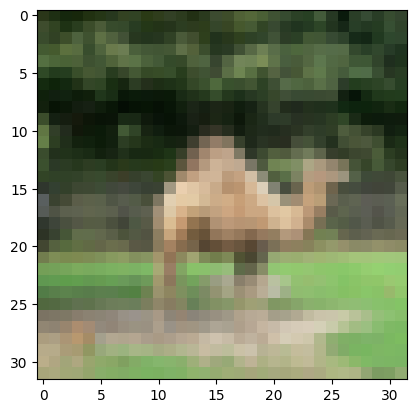

In [63]:
rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx] )
plt.show()